In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set parameters for numerical solutions
# amount of each substance is determined after one time step -- t_step
# a total number of n_iter steps will be evalutated
t_step = 0.01
n_iter = 1000

# define initial values for A, B, and C
A0 = 1
B0 = 0
C0 = 0

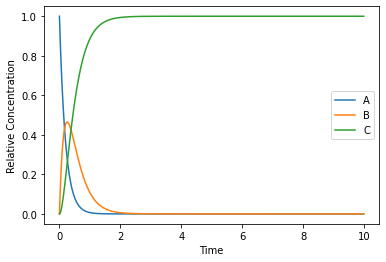

In [3]:
# define reaction constants
k1 = 5
k2 = 3

t = np.arange(0.0, n_iter*t_step, t_step)

# exact solution if each reaction is of first order
A = A0 * np.exp(- k1 * t)
B = A0 * k1 / (k1 - k2) * (np.exp(-k2 * t) - np.exp(-k1 * t))
C = A0 * (1 - (np.exp(-k1 * t)/k1 - np.exp(-k2 *t)/k2)/(1/k1 - 1/k2) )

# plot the time variation of concentrations
fig, ax = plt.subplots()

line1 = ax.plot(t, A, label='A')
line2 = ax.plot(t, B, label='B')
line3 = ax.plot(t, C, label='C')

ax.legend()
plt.ylabel('Relative Concentration')
plt.xlabel('Time')
plt.show()

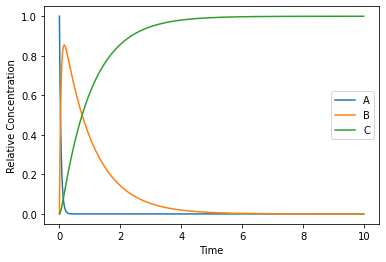

In [4]:
# case study: if k1 is much greater than k2
# first reaction is fast, second reaction is slow
# should expect intermediate product B rises to a high level very quickly
# then B decays exponentially to form C
k1 = 20
k2 = 1

t = np.arange(0.0, n_iter*t_step, t_step)

# exact solution if each reaction is of first order
A = A0 * np.exp(- k1 * t)
B = A0 * k1 / (k1 - k2) * (np.exp(-k2 * t) - np.exp(-k1 * t))
C = A0 * (1 - (np.exp(-k1 * t)/k1 - np.exp(-k2 *t)/k2)/(1/k1 - 1/k2) )

# plot the time variation of concentrations
fig, ax = plt.subplots()

line1 = ax.plot(t, A, label='A')
line2 = ax.plot(t, B, label='B')
line3 = ax.plot(t, C, label='C')

ax.legend()
plt.ylabel('Relative Concentration')
plt.xlabel('Time')
plt.show()

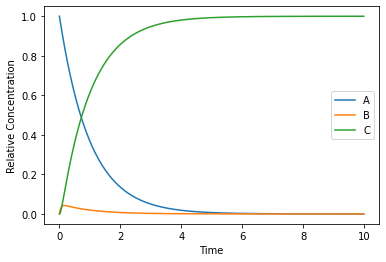

In [5]:
# case study: if k2 is much greater than k1
# first reaction is slow, second reaction is fast
# should expect not much intermediate product B is ever formed
k1 = 1
k2 = 20

t = np.arange(0.0, n_iter*t_step, t_step)

A = A0 * np.exp(- k1 * t)
B = A0 * k1 / (k1 - k2) * (np.exp(-k2 * t) - np.exp(-k1 * t))
C = A0 * (1 - (np.exp(-k1 * t)/k1 - np.exp(-k2 *t)/k2)/(1/k1 - 1/k2) )

# plot the time variation of concentrations
fig, ax = plt.subplots()

line1 = ax.plot(t, A, label='A')
line2 = ax.plot(t, B, label='B')
line3 = ax.plot(t, C, label='C')

ax.legend()
plt.ylabel('Relative Concentration')
plt.xlabel('Time')
plt.show()

In [6]:
# redefine reaction constants
k1 = 5
k2 = 3

In [7]:
# two consecutive first-order reactions
def FO_reaction(a, b, c):
    new_a = a - k1 * a * t_step
    new_b = b + ( k1 * a - k2 * b ) * t_step
    new_c = c + k2 * b * t_step
    return [new_a, new_b, new_c]

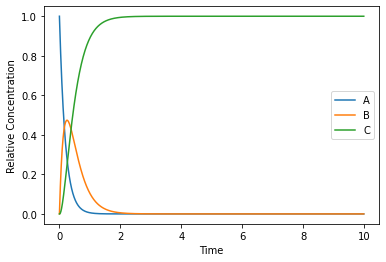

In [8]:
t = np.arange(0.0, n_iter*t_step, t_step)

A, B, C = [0] * n_iter, [0] * n_iter, [0] * n_iter

A[0] = A0
B[0] = B0
C[0] = C0

for i in range(1, n_iter):
    A[i], B[i], C[i] = FO_reaction(A[i-1], B[i-1], C[i-1])

fig, ax = plt.subplots()

line1 = ax.plot(t, A, label='A')
line2 = ax.plot(t, B, label='B')
line3 = ax.plot(t, C, label='C')

ax.legend()
plt.ylabel('Relative Concentration')
plt.xlabel('Time')
plt.show()

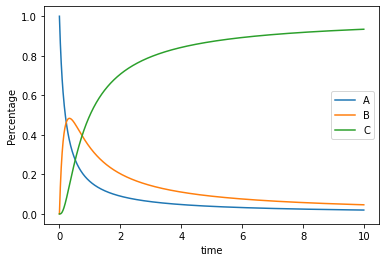

In [9]:
# two consecutive second-order reactions
def SO_reaction(a, b, c):
    new_a = a - k1 * a ** 2 * t_step
    new_b = b + ( k1 * a ** 2 - k2 * b ** 2) * t_step
    new_c = c + k2 * b ** 2 * t_step
    return [new_a, new_b, new_c]

t = np.arange(0.0, n_iter*t_step, t_step)

A, B, C = [0] * n_iter, [0] * n_iter, [0] * n_iter

A[0] = A0
B[0] = B0
C[0] = C0

for i in range(1, n_iter):
    A[i], B[i], C[i] = SO_reaction(A[i-1], B[i-1], C[i-1])

fig, ax = plt.subplots()

line1 = ax.plot(t, A, label='A')
line2 = ax.plot(t, B, label='B')
line3 = ax.plot(t, C, label='C')

ax.legend()
plt.ylabel('Percentage')
plt.xlabel('time')
plt.show()

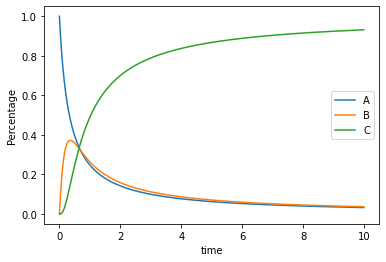

In [10]:
# compare the results if k1 and k2 are swapped
k1, k2 = k2, k1

for i in range(1, n_iter):
    A[i], B[i], C[i] = SO_reaction(A[i-1], B[i-1], C[i-1])

fig, ax = plt.subplots()

line1 = ax.plot(t, A, label='A')
line2 = ax.plot(t, B, label='B')
line3 = ax.plot(t, C, label='C')

ax.legend()
plt.ylabel('Percentage')
plt.xlabel('time')
plt.show()